In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

In [2]:
path = os.path.dirname(os.getcwd()) + '\data\ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


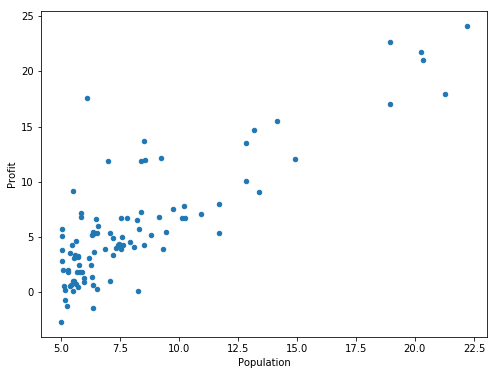

In [4]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(8,6))

In [5]:
data.insert(0, 'ones', 1)

In [6]:
data.head()

,ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [7]:
X = data.iloc[:,:2]

In [8]:
X.head()

,ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
y = data.iloc[:,-1:]

In [10]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [11]:
m = len(X)

In [12]:
m

97

In [13]:
theta = np.mat(np.zeros(2))
iteration = 1500
alpha = 0.01

In [14]:
theta

matrix([[ 0.,  0.]])

In [15]:
X = np.mat(X)
y = np.mat(y)

In [16]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [17]:
def computeCost(X, y, theta):
    inner = np.power((X * theta.T - y), 2)
    return np.sum(inner)/(2 * len(X))

In [18]:
(X * theta.T - y).shape

(97, 1)

In [19]:
computeCost(X, y, theta)

32.072733877455676

In [20]:
def gradientDescent(X, y, theta, alpha, iters):
    cost = np.zeros(iters)
    param = int(theta.ravel().shape[1])
    his_theta = np.zeros((iters, 2)) # to store all thetas
    
    for i in range(iters):
        error = X * theta.T - y
        
        for j in range(param):
            temp = np.multiply(error, X[:,j])
            theta[0,j] = theta[0,j] - (alpha / m) * np.sum(temp)
            his_theta[i,j] = theta[0,j]
            
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost, his_theta

In [21]:
# perform gradient descent to "fit" the model parameters
g, cost, history = gradientDescent(X, y, theta, alpha, iteration)  
g

matrix([[-3.63029144,  1.16636235]])

In [22]:
computeCost(X, y, g)

4.4833882565877259

([<matplotlib.axis.YTick at 0x2c18f673198>,
 <a list of 8 Text yticklabel objects>)

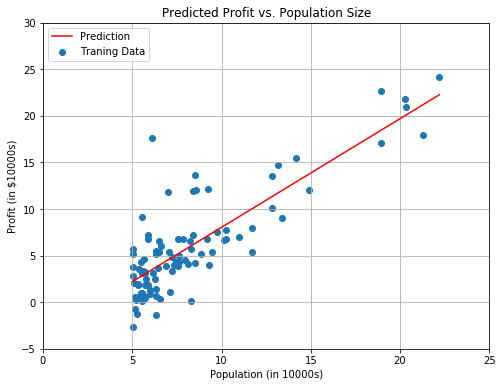

In [23]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)  
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(data.Population, data.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population (in 10000s)')  
ax.set_ylabel('Profit (in $10000s)')  
ax.set_title('Predicted Profit vs. Population Size')  
ax.grid()
plt.xticks(np.arange(0, 30, 5))
plt.yticks(np.arange(-5, 35, 5))

([<matplotlib.axis.YTick at 0x2c18f729630>,
 <a list of 6 Text yticklabel objects>)

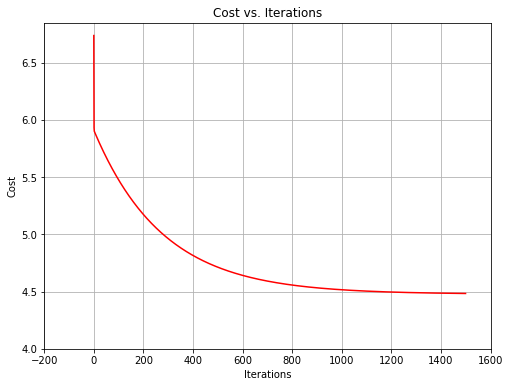

In [24]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(range(len(cost)), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Cost vs. Iterations')
ax.grid()

plt.xticks(np.arange(-200, 1800, 200))
plt.yticks(np.arange(4, 7, 0.5))

In [25]:
theta

matrix([[-3.63029144,  1.16636235]])

In [26]:
cost

array([ 6.73719046,  5.93159357,  5.90115471, ...,  4.48343473,
        4.48341145,  4.48338826])

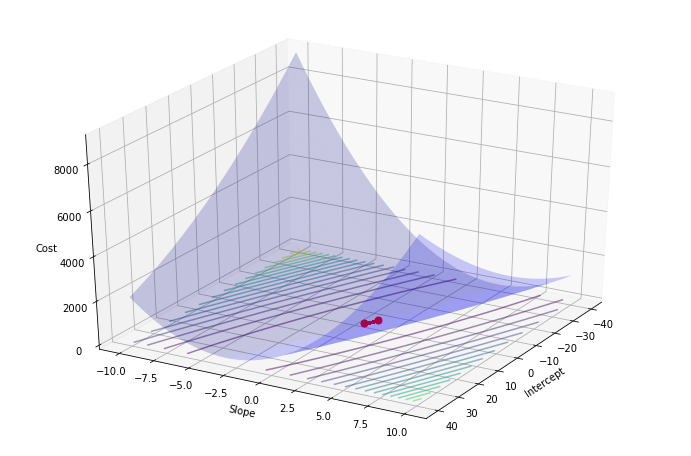

In [27]:
ms = np.linspace(-40 , 40, 20)
bs = np.linspace(-10 , 10, 40)

M, B = np.meshgrid(ms, bs)

zs = np.array([computeCost(X, y, np.mat(theta)) 
               for theta in zip(np.ravel(M), np.ravel(B))])
                   
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Cost')
ax.view_init(elev=30., azim=30)
ax.plot([theta[0,0]], [theta[0,1]], [cost[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7);
ax.plot([history[0, 0]], [history[0, 1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7);


ax.plot([t[0] for t in history], [t[1] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2);
ax.plot([t[0] for t in history], [t[1] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2);

In [28]:
history

array([[ 0.05839135,  0.6532885 ],
       [ 0.06289175,  0.77000978],
       [ 0.05782293,  0.79134812],
       ..., 
       [-3.6293317 ,  1.16626593],
       [-3.62981201,  1.16631419],
       [-3.63029144,  1.16636235]])